In [1]:
import os

data_dir = r'C:\Users\Mega-Pc\Documents\TSYP\Data'
if os.path.exists(data_dir):
    print("Directory exists:", data_dir)
    print("Files in directory:", os.listdir(data_dir))
else:
    print("Directory does not exist:", data_dir)

Directory exists: C:\Users\Mega-Pc\Documents\TSYP\Data
Files in directory: ['.ipynb_checkpoints', 'MCD12Q1.A2001001.h18v05.061.2022146083957.hdf', 'MCD12Q1.A2002001.h18v05.061.2022148054929.hdf', 'MCD12Q1.A2003001.h18v05.061.2022151162750.hdf', 'MCD12Q1.A2004001.h18v05.061.2022152142109.hdf', 'MCD12Q1.A2005001.h18v05.061.2022153022408.hdf', 'MCD12Q1.A2006001.h18v05.061.2022202152112.hdf', 'MCD12Q1.A2007001.h18v05.061.2022153231428.hdf', 'MCD12Q1.A2008001.h18v05.061.2022159024054.hdf', 'MCD12Q1.A2009001.h18v05.061.2022159232052.hdf', 'MCD12Q1.A2010001.h18v05.061.2022160110822.hdf', 'MCD12Q1.A2011001.h18v05.061.2022161182444.hdf', 'MCD12Q1.A2012001.h18v05.061.2022162070707.hdf', 'MCD12Q1.A2013001.h18v05.061.2022164224444.hdf', 'MCD12Q1.A2014001.h18v05.061.2022165121209.hdf', 'MCD12Q1.A2015001.h18v05.061.2022166013040.hdf', 'MCD12Q1.A2016001.h18v05.061.2022166205043.hdf', 'MCD12Q1.A2017001.h18v05.061.2022168060725.hdf', 'MCD12Q1.A2018001.h18v05.061.2022169125300.hdf', 'MCD12Q1.A2019001.h1

In [2]:
from pyhdf.SD import SD, SDC

# Path to the HDF4 file
file_path = r'C:\Users\Mega-Pc\Documents\TSYP\Data\MCD12Q1.A2001001.h18v05.061.2022146083957.hdf'

# Open the file
try:
    hdf_file = SD(file_path, SDC.READ)
    datasets = hdf_file.datasets()

    # Print dataset names and their dimensions
    for dataset_name, dataset_info in datasets.items():
        print(f"Dataset: {dataset_name}")
        print(f"Dimensions: {dataset_info[0]}")
        print(f"Data Type: {dataset_info[3]}")
        
except Exception as e:
    print("Error opening file:", e)


Dataset: LC_Type1
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 0
Dataset: LC_Type2
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 1
Dataset: LC_Type3
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 2
Dataset: LC_Type4
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 3
Dataset: LC_Type5
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 4
Dataset: LC_Prop1_Assessment
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 5
Dataset: LC_Prop2_Assessment
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 6
Dataset: LC_Prop3_Assessment
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 7
Dataset: LC_Prop1
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 8
Dataset: LC_Prop2
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 9
Dataset: LC_Prop3
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 10
Dataset: QC
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Data Type: 11
Dataset: LW
Dimensions: ('YDim:MCD12Q1', 'XDim:MCD12Q1')
Da

In [3]:
from pyhdf.SD import SD, SDC
import pandas as pd
import os

# Path to the directory containing your HDF files
data_dir = r'C:\Users\Mega-Pc\Documents\TSYP\Data'
output_data = []

# Define land cover type mapping for human-readable names
land_cover_mapping = {
    0: 'Water',
    1: 'Evergreen Needleleaf Forest',
    2: 'Evergreen Broadleaf Forest',
    3: 'Deciduous Needleleaf Forest',
    4: 'Deciduous Broadleaf Forest',
    5: 'Mixed Forest',
    6: 'Closed Shrublands',
    7: 'Open Shrublands',
    8: 'Woody Savannas',
    9: 'Savannas',
    10: 'Grasslands',
    11: 'Permanent Wetlands',
    12: 'Croplands',
    13: 'Urban and Built-up',
    14: 'Cropland/Natural Vegetation Mosaic',
    15: 'Snow and Ice',
    16: 'Barren or Sparsely Vegetated',
    17: 'Unclassified',
    18: 'Fill Value'
}

# Loop through each file in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.hdf'):
        file_path = os.path.join(data_dir, file_name)
        
        try:
            # Open the HDF file and extract data
            hdf_file = SD(file_path, SDC.READ)
            dataset = hdf_file.select('LC_Type1')
            data = dataset[:].flatten()  # Flatten the data
            
            # Extract year from file name
            year = int(file_name.split('.')[1][1:5])
            
            # Create a DataFrame for this file's data
            df = pd.DataFrame(data, columns=['Land_Cover_Type'])
            df['Year'] = year
            df['Land_Cover_Name'] = df['Land_Cover_Type'].map(land_cover_mapping)
            
            # Append the DataFrame to the list
            output_data.append(df)
            
            # Print the first few rows to confirm each file's data is being read
            print(f"Processed file: {file_name}, Year: {year}")
        
        except Exception as e:
            print(f"Error reading {file_name}:", e)

# Combine all the DataFrames into one
combined_df = pd.concat(output_data, ignore_index=True)

# Display the total number of rows and unique years in the combined DataFrame
print(f"Total rows in combined DataFrame: {len(combined_df)}")
print("Unique years in DataFrame:", combined_df['Year'].unique())
print(combined_df.head())

# Export the combined DataFrame to CSV
combined_df.to_csv('land_cover_data.csv', index=False)
print("CSV file 'land_cover_data.csv' created successfully!")


Processed file: MCD12Q1.A2001001.h18v05.061.2022146083957.hdf, Year: 2001
Processed file: MCD12Q1.A2002001.h18v05.061.2022148054929.hdf, Year: 2002
Processed file: MCD12Q1.A2003001.h18v05.061.2022151162750.hdf, Year: 2003
Processed file: MCD12Q1.A2004001.h18v05.061.2022152142109.hdf, Year: 2004
Processed file: MCD12Q1.A2005001.h18v05.061.2022153022408.hdf, Year: 2005
Processed file: MCD12Q1.A2006001.h18v05.061.2022202152112.hdf, Year: 2006
Processed file: MCD12Q1.A2007001.h18v05.061.2022153231428.hdf, Year: 2007
Processed file: MCD12Q1.A2008001.h18v05.061.2022159024054.hdf, Year: 2008
Processed file: MCD12Q1.A2009001.h18v05.061.2022159232052.hdf, Year: 2009
Processed file: MCD12Q1.A2010001.h18v05.061.2022160110822.hdf, Year: 2010
Processed file: MCD12Q1.A2011001.h18v05.061.2022161182444.hdf, Year: 2011
Processed file: MCD12Q1.A2012001.h18v05.061.2022162070707.hdf, Year: 2012
Processed file: MCD12Q1.A2013001.h18v05.061.2022164224444.hdf, Year: 2013
Processed file: MCD12Q1.A2014001.h18v0

In [4]:
import pandas as pd

# Load the created CSV file
df = pd.read_csv('land_cover_data.csv')

# Display basic info and the first few rows of the DataFrame
print(df.info())
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132480000 entries, 0 to 132479999
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Land_Cover_Type  int64 
 1   Year             int64 
 2   Land_Cover_Name  object
dtypes: int64(2), object(1)
memory usage: 3.0+ GB
None
   Land_Cover_Type  Year     Land_Cover_Name
0                9  2001            Savannas
1                9  2001            Savannas
2                9  2001            Savannas
3               13  2001  Urban and Built-up
4                9  2001            Savannas
Missing values:
 Land_Cover_Type    0
Year               0
Land_Cover_Name    0
dtype: int64


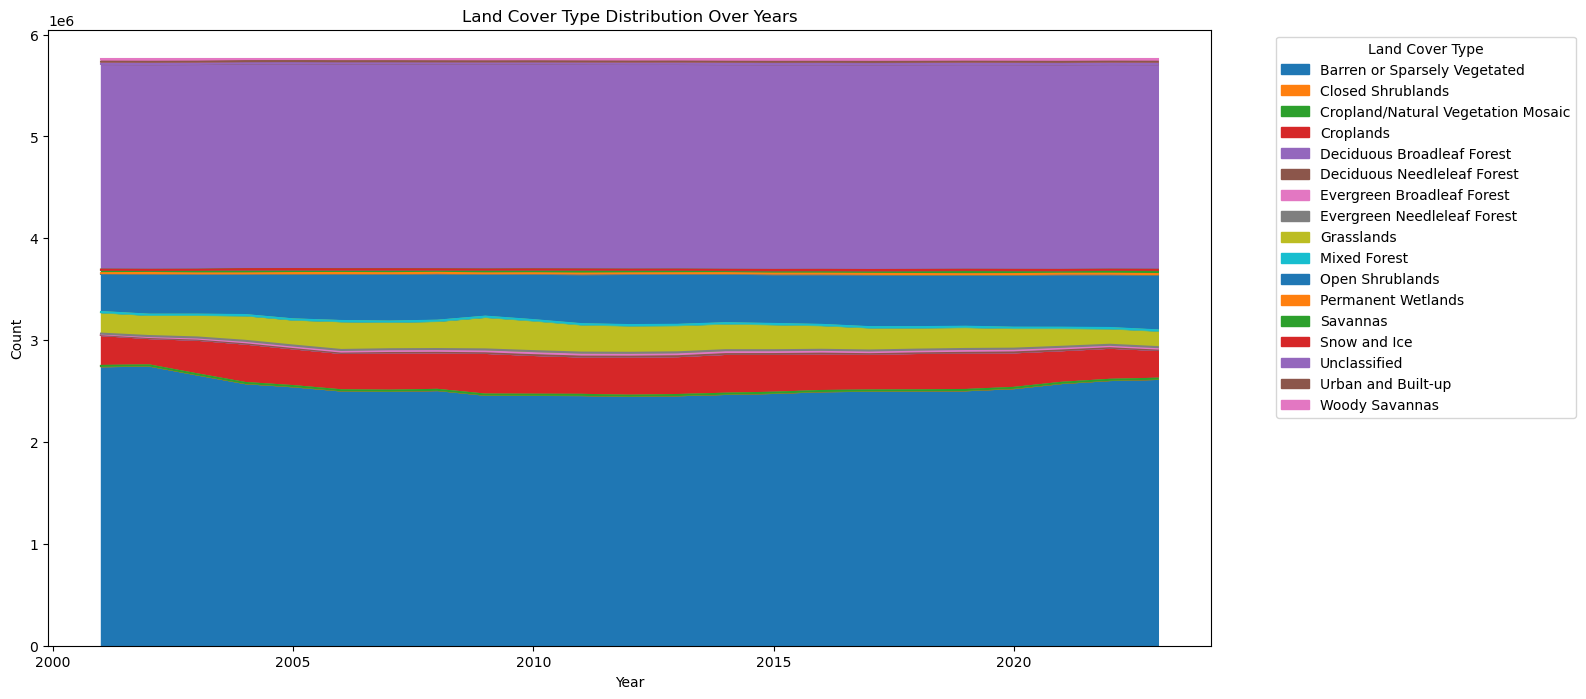

In [5]:
import matplotlib.pyplot as plt

# Plot distribution of Land Cover Types over the years
land_cover_counts = df.groupby(['Year', 'Land_Cover_Name']).size().unstack().fillna(0)
land_cover_counts.plot(kind='area', stacked=True, figsize=(15, 8))
plt.title('Land Cover Type Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Land Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [6]:
yearly_trends = df.groupby(['Year', 'Land_Cover_Name']).size().unstack().fillna(0)
print(yearly_trends)


Land_Cover_Name  Barren or Sparsely Vegetated  Closed Shrublands  \
Year                                                               
2001                                2745454.0              525.0   
2002                                2751674.0              358.0   
2003                                2664184.0              168.0   
2004                                2579003.0              270.0   
2005                                2548123.0              448.0   
2006                                2506984.0              711.0   
2007                                2502821.0              773.0   
2008                                2511423.0              628.0   
2009                                2465031.0              376.0   
2010                                2463651.0              272.0   
2011                                2462517.0              228.0   
2012                                2454031.0              176.0   
2013                                2460680.0   

In [7]:
# Calculate yearly changes
yearly_change = yearly_trends.diff().fillna(0)
print(yearly_change.head())


Land_Cover_Name  Barren or Sparsely Vegetated  Closed Shrublands  \
Year                                                               
2001                                      0.0                0.0   
2002                                   6220.0             -167.0   
2003                                 -87490.0             -190.0   
2004                                 -85181.0              102.0   
2005                                 -30880.0              178.0   

Land_Cover_Name  Cropland/Natural Vegetation Mosaic  Croplands  \
Year                                                             
2001                                            0.0        0.0   
2002                                         -881.0   -34445.0   
2003                                           36.0    70964.0   
2004                                          234.0    47172.0   
2005                                         -152.0   -16148.0   

Land_Cover_Name  Deciduous Broadleaf Forest  Deciduous Needl

In [8]:
yearly_change.to_csv('processed_land_cover_data.csv', index=True)
print("Processed data saved as 'processed_land_cover_data.csv'")


Processed data saved as 'processed_land_cover_data.csv'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132480000 entries, 0 to 132479999
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Land_Cover_Type  int64 
 1   Year             int64 
 2   Land_Cover_Name  object
dtypes: int64(2), object(1)
memory usage: 3.0+ GB
None
   Land_Cover_Type  Year     Land_Cover_Name
0                9  2001            Savannas
1                9  2001            Savannas
2                9  2001            Savannas
3               13  2001  Urban and Built-up
4                9  2001            Savannas
Missing values:
 Land_Cover_Type    0
Year               0
Land_Cover_Name    0
dtype: int64


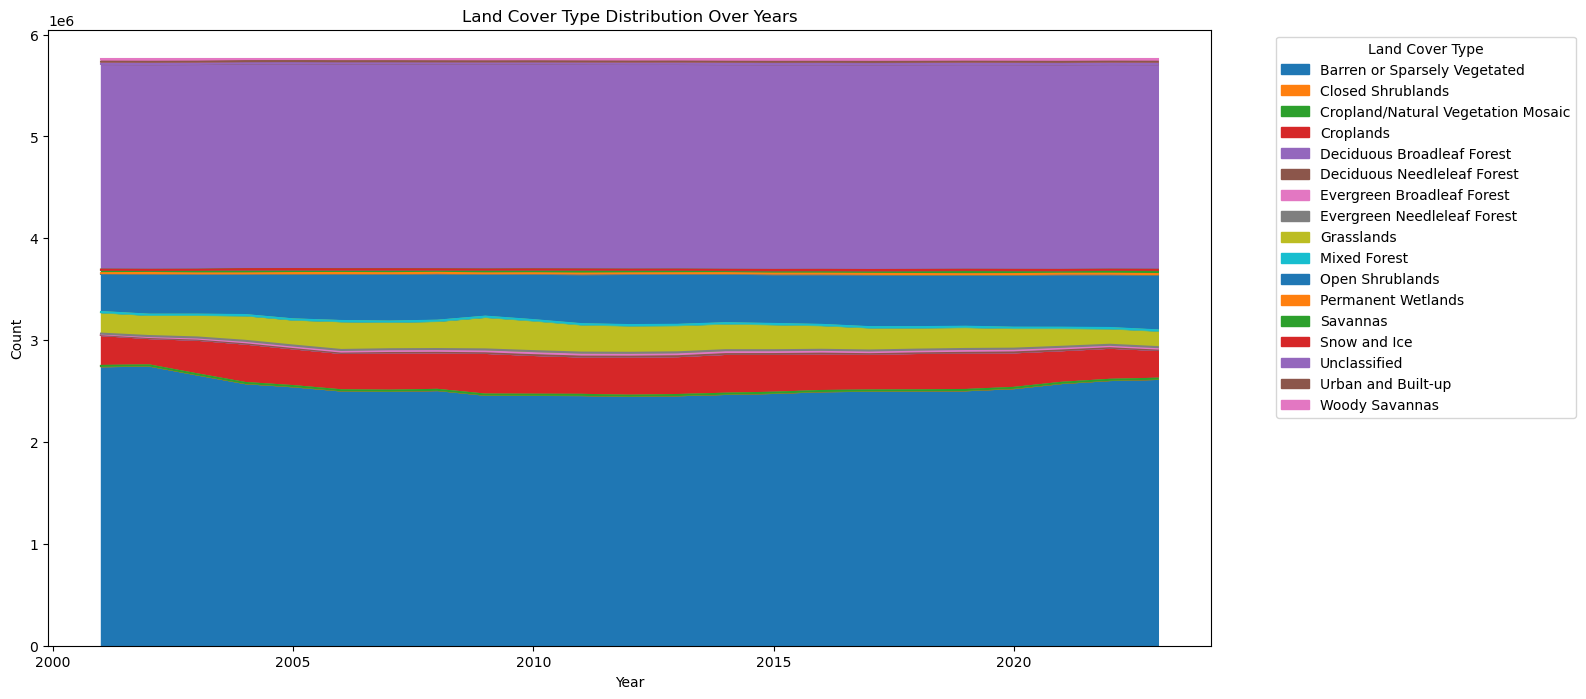

Yearly trends for each Land Cover Type:
 Land_Cover_Name  Barren or Sparsely Vegetated  Closed Shrublands  \
Year                                                               
2001                                2745454.0              525.0   
2002                                2751674.0              358.0   
2003                                2664184.0              168.0   
2004                                2579003.0              270.0   
2005                                2548123.0              448.0   

Land_Cover_Name  Cropland/Natural Vegetation Mosaic  Croplands  \
Year                                                             
2001                                         1518.0   303704.0   
2002                                          637.0   269259.0   
2003                                          673.0   340223.0   
2004                                          907.0   387395.0   
2005                                          755.0   371247.0   

Land_Cover_Name  De

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the created CSV file
df = pd.read_csv('land_cover_data.csv')

# Step 3: Display basic info and check for missing values
print(df.info())
print(df.head())
print("Missing values:\n", df.isnull().sum())

# Step 4: Calculate distribution of Land Cover Types over the years
land_cover_counts = df.groupby(['Year', 'Land_Cover_Name']).size().unstack().fillna(0)

# Step 5: Plot distribution of Land Cover Types over the years
land_cover_counts.plot(kind='area', stacked=True, figsize=(15, 8))
plt.title('Land Cover Type Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Land Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 6: Calculate Yearly Trends for Each Land Cover Type
yearly_trends = df.groupby(['Year', 'Land_Cover_Name']).size().unstack().fillna(0)

# Display the yearly trends to understand how each land cover type changes over time
print("Yearly trends for each Land Cover Type:\n", yearly_trends.head())

# Optional Step: If you'd like to visualize trends for specific Land Cover Types
# Uncomment and customize the code below if desired

# for land_cover in ['Savannas', 'Urban and Built-up', 'Grasslands']:
#     plt.plot(yearly_trends.index, yearly_trends[land_cover], label=land_cover)

# plt.title('Yearly Trend of Selected Land Cover Types')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.legend(title='Land Cover Type')
# plt.show()

In [10]:
yearly_change.to_csv('processed_land_cover_data.csv', index=True)
print("Processed data saved as 'processed_land_cover_data.csv'")


Processed data saved as 'processed_land_cover_data.csv'


In [11]:
# Filter for forest-related land cover types
forest_types = [
    'Evergreen Needleleaf Forest', 
    'Evergreen Broadleaf Forest', 
    'Deciduous Needleleaf Forest', 
    'Deciduous Broadleaf Forest', 
    'Mixed Forest'
]

# Group and calculate the yearly count for these forest types
forest_data = df[df['Land_Cover_Name'].isin(forest_types)].groupby(['Year', 'Land_Cover_Name']).size().unstack().fillna(0)
print(forest_data)


Land_Cover_Name  Deciduous Broadleaf Forest  Deciduous Needleleaf Forest  \
Year                                                                       
2001                                   94.0                          0.0   
2002                                   54.0                          0.0   
2003                                   47.0                          0.0   
2004                                  100.0                          0.0   
2005                                   64.0                          0.0   
2006                                   51.0                          0.0   
2007                                  199.0                          0.0   
2008                                  125.0                          0.0   
2009                                  126.0                          0.0   
2010                                  154.0                          0.0   
2011                                  291.0                          0.0   
2012        

In [12]:
!pip install prophet

In [13]:
from prophet import Prophet
import pandas as pd

# Assuming 'forest_data' is the DataFrame with yearly forest cover counts you previously created

# Select a specific forest type for forecasting, e.g., 'Evergreen Broadleaf Forest'
selected_forest_type = 'Evergreen Broadleaf Forest'
df_prophet = forest_data[[selected_forest_type]].reset_index()
df_prophet.columns = ['ds', 'y']  # Rename columns for Prophet

# Check data
print(df_prophet.head())


     ds        y
0  2001   7331.0
1  2002   9465.0
2  2003  10379.0
3  2004  12415.0
4  2005  12403.0


In [14]:
# Check minimum and maximum year
print(df_prophet['ds'].min(), df_prophet['ds'].max())


2001 2023


In [15]:
# Initialize the Prophet model
model = Prophet()

# Fit the model on your data
model.fit(df_prophet)


22:25:59 - cmdstanpy - INFO - Chain [1] start processing
22:25:59 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
print(df_prophet['ds'].min(), df_prophet['ds'].max())
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=10, freq='YS')  # 'YS' indicates the start of each year
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


22:25:59 - cmdstanpy - INFO - Chain [1] start processing
22:25:59 - cmdstanpy - INFO - Chain [1] done processing


2001-01-01 00:00:00 2023-01-01 00:00:00
           ds          yhat    yhat_lower    yhat_upper
23 2024-01-01  18151.458852  15358.702584  20829.142881
24 2025-01-01  17084.569330  14105.916009  19886.218905
25 2026-01-01  17732.382518  14821.041267  20330.995008
26 2027-01-01  18428.196674  15819.861434  21296.122499
27 2028-01-01  19171.476784  16379.017398  21915.397176
28 2029-01-01  18104.587262  15399.023940  21016.476520
29 2030-01-01  18752.400449  15960.805406  21625.560227
30 2031-01-01  19448.214606  16765.972161  22200.349223
31 2032-01-01  20191.494715  17404.460630  22740.981605
32 2033-01-01  19124.605193  16330.828944  21948.099503


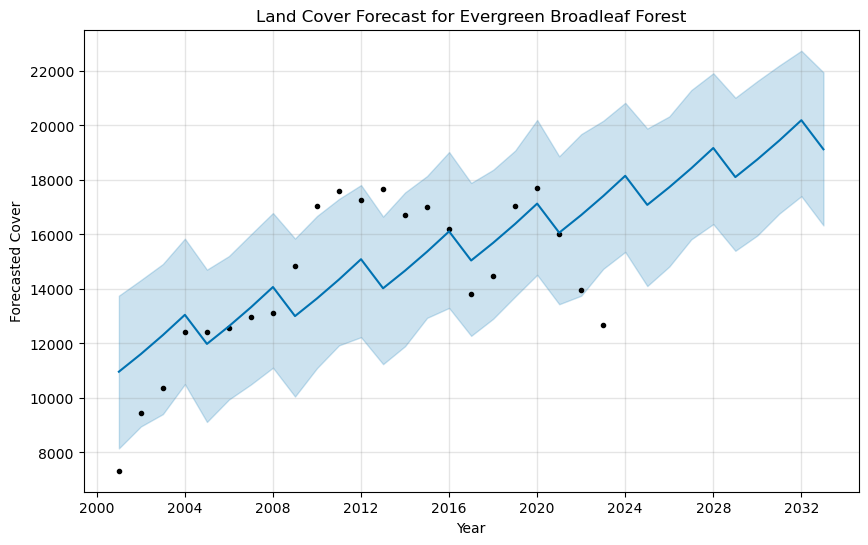

In [17]:
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt

# Plot the forecast using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)
plt.title("Land Cover Forecast for Evergreen Broadleaf Forest")
plt.xlabel("Year")
plt.ylabel("Forecasted Cover")
plt.show()


In [18]:
from prophet.diagnostics import cross_validation, performance_metrics

# Set up cross-validation with a 2-year initial training period, a 6-month spacing between cutoffs, and a 1-year forecast horizon
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

  0%|          | 0/39 [00:00<?, ?it/s]

22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:00 - cmdstanpy - INFO - Chain [1] start processing
22:26:00 - cmdstanpy - INFO - Chain [1] done processing
22:26:01 - cmdstanpy - INFO - Chain [1] start processing
22:26:01 - cmdstanpy - INFO - Chain [1] done processing
22:26:01 - cmdstanpy - INFO - Chain [1] start processing
22:26:01 - cmdstanpy - INFO - Chain [1] done processing
22:26:01 - cmdstanpy - INFO - Chain [1] start processing
22:26:01 - cmdstanpy - INFO - Chain [1]

   horizon           mse         rmse          mae      mape     mdape  \
0  96 days  1.052140e+06  1025.738590   941.139578  0.075359  0.067652   
1 101 days  1.907543e+06  1381.138143  1333.752476  0.105008  0.118115   
2 106 days  3.184932e+06  1784.637915  1764.005189  0.136607  0.129258   
3 112 days  2.573772e+06  1604.298008  1471.703807  0.110863  0.129258   
4 117 days  2.427119e+06  1557.921493  1426.158738  0.097946  0.090505   

      smape  coverage  
0  0.072702  0.000000  
1  0.099460  0.000000  
2  0.127728  0.000000  
3  0.104465  0.333333  
4  0.095592  0.333333  


In [19]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import pandas as pd

# Define the hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
import itertools
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Store the cross-validation results for each combination
results = []

# Perform grid search
for params in all_params:
    # Set up the Prophet model with specified parameters
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale']
    )
    model.fit(df_prophet)
    
    # Perform cross-validation with a 365-day (1-year) horizon
    df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=0.1)
    
    # Get the average MAPE for this parameter combination
    mean_mape = df_p['mape'].mean()
    
    # Save the parameters and MAPE
    results.append((params, mean_mape))

# Find the parameters with the lowest MAPE
best_params = min(results, key=lambda x: x[1])
print('Best Parameters:', best_params[0])
print('MAPE:', best_params[1])


22:26:08 - cmdstanpy - INFO - Chain [1] start processing
22:26:08 - cmdstanpy - INFO - Chain [1] done processing
22:26:16 - cmdstanpy - INFO - Chain [1] start processing
22:26:16 - cmdstanpy - INFO - Chain [1] done processing
22:26:25 - cmdstanpy - INFO - Chain [1] start processing
22:26:25 - cmdstanpy - INFO - Chain [1] done processing
22:26:34 - cmdstanpy - INFO - Chain [1] start processing
22:26:34 - cmdstanpy - INFO - Chain [1] done processing
22:26:41 - cmdstanpy - INFO - Chain [1] start processing
22:26:42 - cmdstanpy - INFO - Chain [1] done processing
22:26:49 - cmdstanpy - INFO - Chain [1] start processing
22:26:49 - cmdstanpy - INFO - Chain [1] done processing
22:26:57 - cmdstanpy - INFO - Chain [1] start processing
22:26:57 - cmdstanpy - INFO - Chain [1] done processing
22:27:09 - cmdstanpy - INFO - Chain [1] start processing
22:27:09 - cmdstanpy - INFO - Chain [1] done processing
22:27:22 - cmdstanpy - INFO - Chain [1] start processing
22:27:22 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}
MAPE: 0.09060959724568274


22:28:52 - cmdstanpy - INFO - Chain [1] start processing
22:28:53 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper
23 2024-01-01  14239.473698  12833.938368  15692.696903
24 2025-01-01  13680.984602  12265.267624  15036.238082
25 2026-01-01  13496.602916  11983.791331  15024.312222
26 2027-01-01  13312.276458  11876.470091  14711.129976
27 2028-01-01  13127.891611  11703.208842  14656.723672
28 2029-01-01  12569.402516  11032.303740  14203.459522
29 2030-01-01  12385.020829  10557.503030  14121.658325
30 2031-01-01  12200.694371  10202.805306  14086.535929
31 2032-01-01  12016.309524  10057.413252  14343.621479
32 2033-01-01  11457.820429   9121.284918  13877.503128


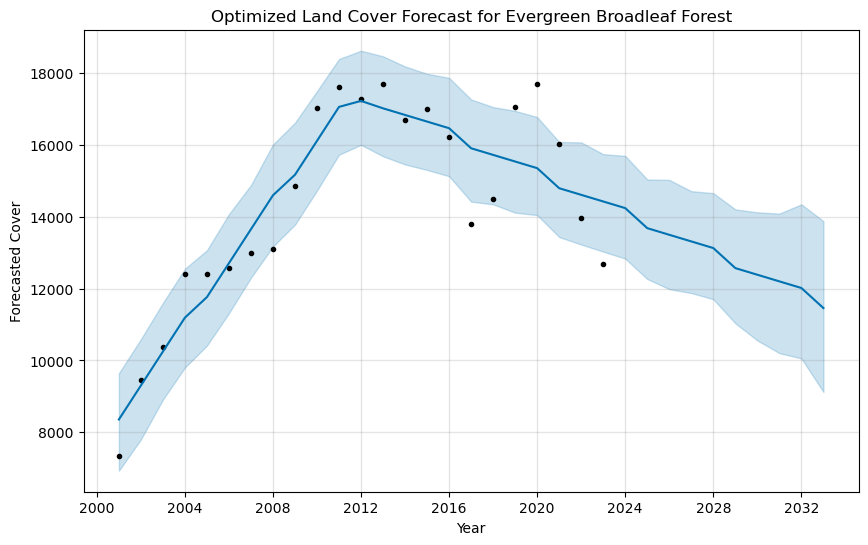

In [20]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Refit the model with the optimal parameters
model_optimized = Prophet(
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=0.1
)

# Fit the model on the data
model_optimized.fit(df_prophet)

# Generate future dates and make the forecast
future_optimized = model_optimized.make_future_dataframe(periods=10, freq='YS')
forecast_optimized = model_optimized.predict(future_optimized)

# Display the forecasted values
print(forecast_optimized[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
model_optimized.plot(forecast_optimized, ax=ax)
plt.title("Optimized Land Cover Forecast for Evergreen Broadleaf Forest")
plt.xlabel("Year")
plt.ylabel("Forecasted Cover")
plt.show()

In [21]:
!pip install dash plotly

In [46]:
# Example of selecting a forest type for prediction
selected_forest_type = 'Evergreen Broadleaf Forest'  # Adjust this based on your data
df_prophet = forest_data[forest_data['Land_Cover_Name'] == selected_forest_type][['Year', 'Count']].reset_index(drop=True)
df_prophet.columns = ['ds', 'y']  # Rename columns for Prophet
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')  # Ensure 'ds' is datetime
print(df_prophet.head())


KeyError: 'Land_Cover_Name'

In [48]:
print(forest_data.columns)

Index(['Deciduous Broadleaf Forest', 'Deciduous Needleleaf Forest',
       'Evergreen Broadleaf Forest', 'Evergreen Needleleaf Forest',
       'Mixed Forest'],
      dtype='object', name='Land_Cover_Name')


In [52]:
forest_data = forest_data.reset_index()

In [54]:
selected_forest_type = 'Evergreen Broadleaf Forest'  # Adjust as needed
df_prophet = forest_data[forest_data['Land_Cover_Name'] == selected_forest_type][['Year', 'Count']].reset_index(drop=True)
df_prophet.columns = ['ds', 'y']  # Rename columns for Prophet
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')  # Ensure 'ds' is datetime
print(df_prophet.head())

KeyError: 'Land_Cover_Name'

In [56]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecasted_land_cover.csv", index=False)

In [1]:
from prophet import Prophet
import pandas as pd

# Load the processed data
df = pd.read_csv("processed_land_cover_data.csv")

# Prepare a DataFrame to store all forecast results
all_forecasts = []

# Loop through each land cover type
for land_cover_type in df.columns[1:]:  # Skip the 'Year' column
    print(f"Processing: {land_cover_type}")
    
    # Prepare data for Prophet
    temp_df = df[['Year', land_cover_type]].rename(columns={'Year': 'ds', land_cover_type: 'y'})
    temp_df['ds'] = pd.to_datetime(temp_df['ds'], format='%Y')
    
    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(temp_df)
    
    # Create future data points
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    
    # Add the land cover type to the forecast DataFrame
    forecast['Land_Cover_Type'] = land_cover_type
    
    # Append the relevant columns to all_forecasts
    all_forecasts.append(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Land_Cover_Type']])

# Combine all forecasts into a single DataFrame
all_forecasts_df = pd.concat(all_forecasts)

# Save to a CSV file
all_forecasts_df.to_csv("all_forecasted_land_cover.csv", index=False)
print("Forecasting completed and saved to all_forecasted_land_cover.csv")

Processing: Barren or Sparsely Vegetated


16:26:10 - cmdstanpy - INFO - Chain [1] start processing
16:26:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:10 - cmdstanpy - INFO - Chain [1] start processing
16:26:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Closed Shrublands
Processing: Cropland/Natural Vegetation Mosaic


16:26:11 - cmdstanpy - INFO - Chain [1] start processing
16:26:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:11 - cmdstanpy - INFO - Chain [1] start processing
16:26:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Croplands
Processing: Deciduous Broadleaf Forest


16:26:11 - cmdstanpy - INFO - Chain [1] start processing
16:26:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:11 - cmdstanpy - INFO - Chain [1] start processing
16:26:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Deciduous Needleleaf Forest
Processing: Evergreen Broadleaf Forest


16:26:11 - cmdstanpy - INFO - Chain [1] start processing
16:26:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:11 - cmdstanpy - INFO - Chain [1] start processing
16:26:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Evergreen Needleleaf Forest
Processing: Grasslands


16:26:12 - cmdstanpy - INFO - Chain [1] start processing
16:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:12 - cmdstanpy - INFO - Chain [1] start processing
16:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:12 - cmdstanpy - INFO - Chain [1] start processing


Processing: Mixed Forest
Processing: Open Shrublands


16:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:12 - cmdstanpy - INFO - Chain [1] start processing
16:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Permanent Wetlands
Processing: Savannas


16:26:12 - cmdstanpy - INFO - Chain [1] start processing
16:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:12 - cmdstanpy - INFO - Chain [1] start processing
16:26:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Snow and Ice
Processing: Unclassified


16:26:12 - cmdstanpy - INFO - Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
16:26:13 - cmdstanpy - INFO - Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Processing: Urban and Built-up
Processing: Woody Savannas


16:26:13 - cmdstanpy - INFO - Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [1] done processing


Forecasting completed and saved to all_forecasted_land_cover.csv


C:\Users\Mega-Pc\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
